In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
#estimator
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C = 100)

In [4]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
clf.predict(digits.data[-1:])

array([8])

In [6]:
digits.data[-1:]
digits.target[-1:]


array([8])

In [7]:
X, y = iris.data, iris.target
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
import pickle

In [9]:
from sklearn.model_selection import train_test_split #splitting data test and real
from sklearn import preprocessing #scaling, transforming and wrangling
from sklearn.ensemble import RandomForestRegressor #import random forest model
#cross validation pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
#metrics for your model
from sklearn.metrics import mean_squared_error, r2_score
#to save models
from sklearn.externals import joblib
import pandas as pd
from sklearn.naive_bayes import GaussianNB

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [10]:
#Import data and explore
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep = ";")
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#split your data
y = data.quality
X = data.drop('quality', axis=1)

#train vs test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [12]:
#standardize your data, subtract the means from each feature and then divide by the feature standard deviations
#Scale your data
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)

[[ 0.51358886  2.19680282 -0.164433   ...  1.08415147 -0.69866131
  -0.58608178]
 [-1.73698885 -0.31792985 -0.82867679 ...  1.46964764  1.2491516
   2.97009781]
 [-0.35201795  0.46443143 -0.47100705 ... -0.13658641 -0.35492962
  -0.20843439]
 ...
 [-0.98679628  1.10708533 -0.93086814 ...  0.24890976 -0.98510439
   0.35803669]
 [-0.69826067  0.46443143 -1.28853787 ...  1.08415147 -0.35492962
  -0.68049363]
 [ 3.1104093  -0.62528606  2.08377675 ... -1.61432173  0.79084268
  -0.39725809]]


In [13]:
#transformer API: fit a preprocessing step using the training data.
scaler = preprocessing.StandardScaler().fit(X_train) 
#the scaler object has the saved means and standard deviations for each feature in the training set.
#Confirmation that it worked. Apply transformer to training data:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0)) #should be zero
print(X_train_scaled.std(axis=0)) #should be 1

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
#Apply transformer to test data
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.mean(axis=0)) #should not be zero
print(X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


In [15]:
#Pipeline with preprocessing and model. Cross Validation pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

In [16]:
#Declare hyperparameters
#print(pipeline.get_params())
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [17]:
#Tune model using a cross-validation pipeline.
#maximize model performance while reducing the chance of overfitting.
#Sklearn cross-validation with pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

#It found the best parameters
print(clf.best_params_)

#Confirm model will be retrained for best fit
print(clf.refit)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}
True


In [18]:
#Evaluate model pipeline on test data
#Predict a new set of data
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4777160845087476
0.33701593750000003


In [19]:
iris.keys()
X = iris.data
y = iris.target

#train vs test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

#standardize your data, subtract the means from each feature and then divide by the feature standard deviations
#Scale your data
X_train_scaled = preprocessing.scale(X_train)

#transformer API: fit a preprocessing step using the training data.
scaler = preprocessing.StandardScaler().fit(X_train) 

#the scaler object has the saved means and standard deviations for each feature in the training set.
#Confirmation that it worked. Apply transformer to training data:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0)) #should be zero
print(X_train_scaled.std(axis=0)) #should be 1

[-6.69487613e-16  3.55387016e-16  5.07464441e-16 -3.27978385e-16]
[1. 1. 1. 1.]


In [20]:
#Apply transformer to test data
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.mean(axis=0)) #should not be zero
print(X_test_scaled.std(axis=0))

[0.13699216 0.04649906 0.02497139 0.03519894]
[1.19615786 1.02253879 1.06496248 1.01925097]


In [21]:
#Pipeline with preprocessing and model. Cross Validation pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

#Declare hyperparameters
#print(pipeline.get_params())
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

#Tune model using a cross-validation pipeline.
#maximize model performance while reducing the chance of overfitting.
#Sklearn cross-validation with pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

#It found the best parameters
print(clf.best_params_)

#Confirm model will be retrained for best fit
print(clf.refit)

{'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 'log2'}
True


In [22]:
#Evaluate model pipeline on test data
#Predict a new set of data
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9245327187035782
0.05031152086428118


In [23]:
def reno_supervised_ml(data_y, data_X):
    #train vs test
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=123, stratify=y)
    #scale data
    X_train_scaled = preprocessing.scale(X_train)
    #transformer API: fit a preprocessing step using the training data.
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #Random Forest#
    #Pipeline with preprocessing and model.
    pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))
    #Sklearn cross-validation with pipeline
    clf = GridSearchCV(pipeline, hyperparameters, cv=10)
    # Fit and tune model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Random Forest:')
    print('R_Squared: ' + str(r2_score(y_test, y_pred)))
    print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
    print("")
    #Gaussian Naive Bayes#
    clf = GaussianNB()
    # Fit and tune model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Gaussian Naive Bayes:')
    print('R_Squared: ' + str(r2_score(y_test, y_pred)))
    print('MSE: ' + str(mean_squared_error(y_test, y_pred)))

In [24]:
#reno_supervised_ml(iris.target, iris.data,0)

TypeError: reno_supervised_ml() takes 2 positional arguments but 3 were given

In [25]:
def reno_supervised_ml(data_y, data_X):
    #train vs test
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=123, stratify=y)
    #scale data
    X_train_scaled = preprocessing.scale(X_train)
    #transformer API: fit a preprocessing step using the training data.
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #Pipeline with preprocessing and model.
    
    #Sklearn cross-validation with pipeline
    clf = GaussianNB()
    # Fit and tune model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('R_Squared: ' + str(r2_score(y_test, y_pred)))
    print('MSE: ' + str(mean_squared_error(y_test, y_pred)))

# Nearest-Neighbors Analysis

In [26]:
X = iris.data
y = iris.target

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#Instantiate the estimator
khn = KNeighborsClassifier(n_neighbors=1)
#Fit the model = Model training
khn.fit(X,y)
#Predict the response for a new observation
khn.predict([[3,5,4,2]])
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
khn.predict(X_new)

array([2, 1])

A different n_neighbors. 
An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [29]:
#Instantiate the estimator
khn = KNeighborsClassifier(n_neighbors=5)
#Fit the model = Model training
khn.fit(X,y)
#Predict the response for a new observation
khn.predict([[3,5,4,2]])
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
khn.predict(X_new)

array([1, 1])

# Logistic Regression

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X, y)
# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

# Model Evaluation Procedure

## Evaluation 1: Train and Test on the entire dataset

1 - Train and test on the entire dataset

In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

2 - Test your model

In [32]:
#store predictions
y_pred = logreg.predict(X)

#number of predictions
len(y_pred)

150

In [33]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


# KNN (K=5) vs KNN (K=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


## Overfitting:
   - Goal is to estimate likely performance of a model on out-of-sample data
   - But, maximizing training accuracy rewards overly complex models that won't necessarily generalize
   - Unnecessarily complex models overfit the training data

## Evaluation Procedure 2: Tain/test split

### Downsides of train/test split?

- Provides a high-variance estimate of out-of-sample accuracy
- K-fold cross-validation overcomes this limitation
- But, train/test split is still useful because of its flexibility and speed

In [36]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
#KNN (K=5)
#Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#Make predictions
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [38]:
#KNN (K=1)
#Train model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#Make predictions
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Testing different K numbers, basically create a loop.

In [42]:
k_range = list(range(1,25))
scores = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #Make predictions
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print("K Numbers: " + str(k) + ' Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))

K Numbers: 1 Accuracy: 0.95
K Numbers: 2 Accuracy: 0.95
K Numbers: 3 Accuracy: 0.9666666666666667
K Numbers: 4 Accuracy: 0.9666666666666667
K Numbers: 5 Accuracy: 0.9666666666666667
K Numbers: 6 Accuracy: 0.9833333333333333
K Numbers: 7 Accuracy: 0.9833333333333333
K Numbers: 8 Accuracy: 0.9833333333333333
K Numbers: 9 Accuracy: 0.9833333333333333
K Numbers: 10 Accuracy: 0.9833333333333333
K Numbers: 11 Accuracy: 0.9833333333333333
K Numbers: 12 Accuracy: 0.9833333333333333
K Numbers: 13 Accuracy: 0.9833333333333333
K Numbers: 14 Accuracy: 0.9833333333333333
K Numbers: 15 Accuracy: 0.9833333333333333
K Numbers: 16 Accuracy: 0.9833333333333333
K Numbers: 17 Accuracy: 0.9833333333333333
K Numbers: 18 Accuracy: 0.9666666666666667
K Numbers: 19 Accuracy: 0.9833333333333333
K Numbers: 20 Accuracy: 0.9666666666666667
K Numbers: 21 Accuracy: 0.9666666666666667
K Numbers: 22 Accuracy: 0.9666666666666667
K Numbers: 23 Accuracy: 0.9666666666666667
K Numbers: 24 Accuracy: 0.95


Text(0, 0.5, 'Testing Accuracy')

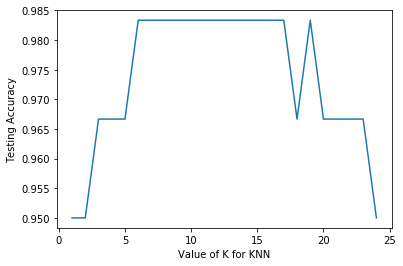

In [43]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- Training accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the value of K (lower value = more complex)

## Seaborn and pandas

In [49]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [46]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


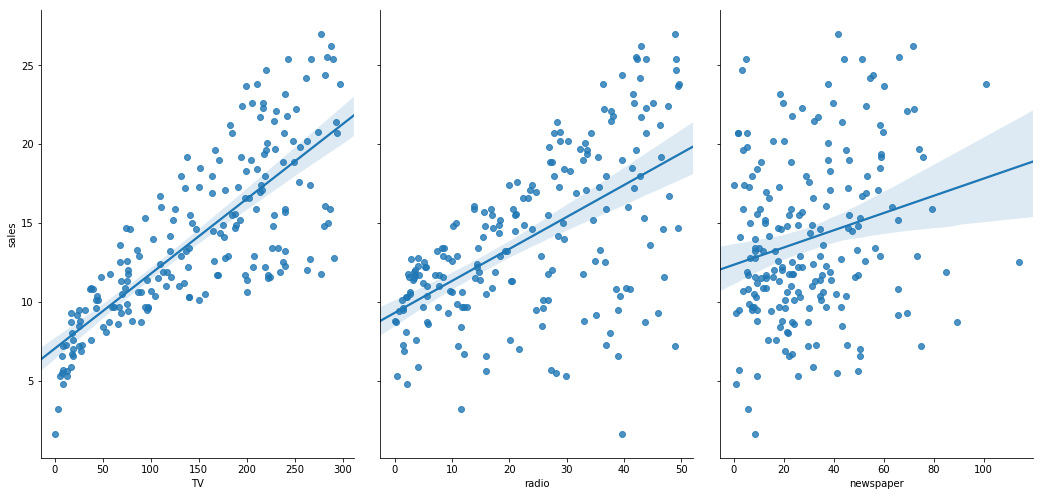

In [52]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars=['sales'], size=7, aspect=0.7, kind='reg');

# Linear Regression:
- Pros: fast, no tuning required, well-understood.
- Cons: unlikely to produce the best predictive accuracy, because assumes linear relationship between fields.

In [83]:
from sklearn.linear_model import LinearRegression

#definying y and x
y = data['sales']
X = data.drop('sales', axis = 1)

#feature columns
feature_cols = list(X.columns)
feature_cols = ['TV', 'Radio', 'Newspaper']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# STEP 2: train the model on the training set
linr = LinearRegression()
linr.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = linr.predict(X_test)

# print the intercept and coefficients
print(linr.intercept_)
print(linr.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linr.coef_))

from sklearn import metrics
from math import sqrt
print('Mean Absolute Error (MAE): ' + str(metrics.mean_absolute_error(y_test, y_pred))) #Mean Absolute Error (MAE)
print('Mean Squared Error (MSE): ' + str(metrics.mean_squared_error(y_test, y_pred))) #Mean Squared Error (MSE)
print('Root Mean Squared Error (RMSE): ' + str(sqrt(metrics.mean_squared_error(y_test, y_pred)))) #Root Mean Squared Error (RMSE)
print('R2- Squared: ' + str(metrics.r2_score(y_test, y_pred)))

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
Mean Absolute Error (MAE): 1.0668917082595206
Mean Squared Error (MSE): 1.9730456202283366
Root Mean Squared Error (RMSE): 1.4046514230328948
R2- Squared: 0.9156213613792232


### Comparing these metrics:
 - MAE is the easiest to understand, because it's the average error.
 - MSE is more popular than MAE, because MSE "punishes" larger errors.
 - RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Test if we actually need the 'newspaper' column in our model

In [85]:
from sklearn.linear_model import LinearRegression

#definying y and x
y = data['sales']
X = data.drop(['sales','newspaper'], axis = 1)

#feature columns
feature_cols = list(X.columns)
feature_cols = ['TV', 'Radio', 'Newspaper']

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# STEP 2: train the model on the training set
linr = LinearRegression()
linr.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = linr.predict(X_test)

# print the intercept and coefficients
print(linr.intercept_)
print(linr.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linr.coef_))

from sklearn import metrics
from math import sqrt
print('Mean Absolute Error (MAE): ' + str(metrics.mean_absolute_error(y_test, y_pred))) #Mean Absolute Error (MAE)
print('Mean Squared Error (MSE): ' + str(metrics.mean_squared_error(y_test, y_pred))) #Mean Squared Error (MSE)
print('Root Mean Squared Error (RMSE): ' + str(sqrt(metrics.mean_squared_error(y_test, y_pred)))) #Root Mean Squared Error (RMSE)
print('R2- Squared: ' + str(metrics.r2_score(y_test, y_pred)))

2.9272373202664816
[0.04660234 0.18117959]
Mean Absolute Error (MAE): 1.0477590411212607
Mean Squared Error (MSE): 1.9262760418667417
Root Mean Squared Error (RMSE): 1.3879034699382886
R2- Squared: 0.9176214942248908


Errors went down and R2-Squared went up. Which means that we don't need the newspaper column, we're better off without it.

## Review of model evaluation procedures

In [86]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [89]:
X = iris.data
y = iris.target

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


### Cross-Validation: Create a buck of train/test splits, calculate testing accuracy of each and average the results.

### K-fold cross-validation:
1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

In [117]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


## Comparing cross-validation to train/test split

### Advantages of cross-validation:
- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

### Advantages of train/test split:
- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

### Cross-validation recommendations
1. K can be any number, but K=10 is generally recommended
2. For classification problems, stratified sampling is recommended for creating the folds
   - Each response class should be represented with equal proportions in each of the K folds
   - scikit-learn's cross_val_score function does this by default

## Cross-validation example: parameter tuning

In [119]:
from sklearn.cross_validation import cross_val_score

In [123]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [121]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


Text(0, 0.5, 'Testing Accuracy')

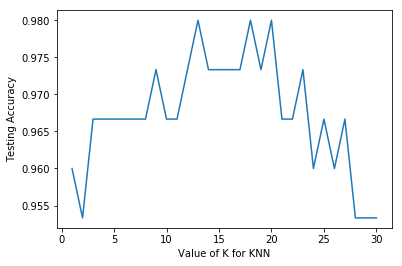

In [127]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_list = []
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    k_list.append(k)

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_list, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Cross-validation: model selection

#### Goal: Compare the best KNN model with logistic regression on the iris dataset


In [128]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [129]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


### Cross-validation example: feature selection

#### Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [131]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [135]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

In [136]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

In [137]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [138]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [139]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051797


In [141]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

1.6796748419090766


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

## Improvements to cross-validation

## Repeated cross-validation
- Repeat cross-validation multiple times (with different random splits of the data) and average the results
- More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

## Creating a hold-out set
- "Hold out" a portion of the data before beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
- More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

## Feature engineering and selection within cross-validation iterations
- Normally, feature engineering and selection occurs before cross-validation
- Instead, perform all feature engineering and selection within each cross-validation iteration
- More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

## Efficiently searching for optimal tuning parameters

### Review of K-fold cross-validation

#### Steps for cross-validation:
- Dataset is split into K "folds" of equal size
- Each fold acts as the testing set 1 time, and acts as the training set K-1 times
- Average testing performance is used as the estimate of out-of-sample performance

#### Benefits of cross-validation:
- More reliable estimate of out-of-sample performance than train/test split
- Can be used for selecting tuning parameters, choosing between models, and selecting features

#### Drawbacks of cross-validation:
- Can be computationally expensive

### Review of parameter tuning using cross_val_score
Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [142]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
#Load iris data
iris = load_iris()

#Defining x and y
X = iris.data
y = iris.target

In [145]:
# 10-fold cross-validation with K=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [146]:
#search for optimal value of K for KNN
k_range = list(range(1,31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

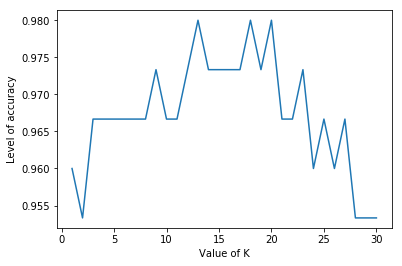

In [147]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Level of accuracy');

## More efficient parameter tuning using GridSearchCV

### Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [152]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [153]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [154]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [155]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [156]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [161]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
0.96


In [162]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


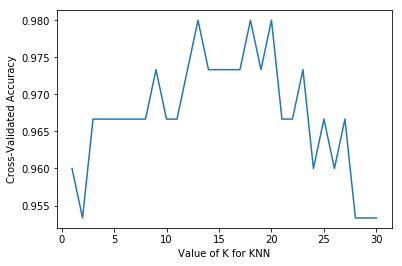

In [165]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [166]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Searching multiple parameters simultaneously
- Example: tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
- Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, and vice versa
- But, best performance might be achieved when neither parameter is at its default value

In [167]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [168]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [169]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [170]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [171]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [173]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [174]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array([1])

## Reducing computational expense using RandomizedSearchCV
- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [175]:
from sklearn.grid_search import RandomizedSearchCV

In [176]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [177]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [178]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [179]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98]


## Evaluating a classification model

### Model evaluation procedures
- #### Training and testing on the same data
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
- #### Train/test split
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
- #### K-fold cross-validation
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics
- Regression problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- Classification problems: Classification accuracy

### Classification accuracy

In [184]:
# read the data into a Pandas DataFrame
import pandas as pd
url = 'C:\\Users\\renon\\Downloads\\diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names, skiprows=1)

In [186]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Question: Can we predict the diabetes status of a patient given their health measurements?

In [187]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [188]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [189]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#Verifying the results of X_test and comparing against the real results
y_pred_class = logreg(X_test)
